In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
import scipy,scipy.stats
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

In [3]:
Train=pd.read_csv('train.csv')

Test=pd.read_csv('test.csv')



In [4]:
print('train data shape:',Train.shape)
print('test data shape:',Test.shape)

train data shape: (1460, 81)
test data shape: (1459, 80)


In [5]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
print(Train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


skew is: 1.8828757597682129


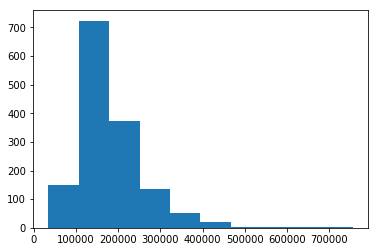

In [8]:
print('skew is:',Train.SalePrice.skew())
plt.hist(Train.SalePrice)
plt.show()

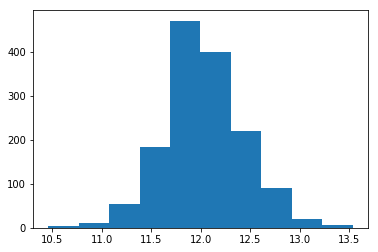

In [9]:
target=np.log(Train.SalePrice)
plt.hist(target)
plt.show()


In [14]:
numeric_features=Train#.select_dtypes(include=[np.number])
corr=numeric_features.corr()

print(corr['SalePrice'].sort_values(ascending=False)[:5])
print(corr['SalePrice'].sort_values(ascending=False)[-5:])
corr

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


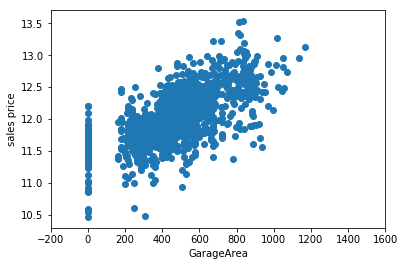

In [15]:
Train=Train[Train['GarageArea']<1200]
plt.scatter(x=Train['GarageArea'],y=np.log(Train.SalePrice))
plt.xlim(-200,1600)#same scale as before
plt.ylabel('sales price')
plt.xlabel('GarageArea')
plt.show()


In [16]:
#handling null values
nulls=pd.DataFrame(Train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns=['null count']
nulls.index.name='feature'
print(nulls)

              null count
feature                 
PoolQC              1449
MiscFeature         1402
Alley               1364
Fence               1174
FireplaceQu          689
LotFrontage          258
GarageCond            81
GarageType            81
GarageYrBlt           81
GarageFinish          81
GarageQual            81
BsmtExposure          38
BsmtFinType2          38
BsmtFinType1          37
BsmtCond              37
BsmtQual              37
MasVnrArea             8
MasVnrType             8
Electrical             1
Utilities              0
YearRemodAdd           0
MSSubClass             0
Foundation             0
ExterCond              0
ExterQual              0


In [17]:
categorical=Train.select_dtypes(exclude=[np.number])
print(categorical.describe())

       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1455   1455    91     1455        1455      1455      1455   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1147   1450    50      921        1309      1454      1048   

       LandSlope Neighborhood Condition1      ...      GarageType  \
count       1455         1455       1455      ...            1374   
unique         3           25          9      ...               6   
top          Gtl        NAmes       Norm      ...          Attchd   
freq        1378          225       1257      ...             867   

       GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence  \
count          1374       1374       1374       1455      6    281   
unique            3          5          5          3      3      4   
top             Unf         TA         TA          Y     Gd  MnPrv   
freq    

In [18]:
#dealing with missing values
data=Train.select_dtypes(include=[np.number]).interpolate().dropna()
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
print(sum(data.isnull().sum()!=0))

0


In [25]:
#build a linear model
x=data.drop(['SalePrice','Id'],axis=1)
y=np.log(Train['SalePrice'])

In [26]:
#partioning the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=12)
ln=LinearRegression()#call the function
ln.fit(x_train,y_train)#fit the model
print(ln.intercept_)# get the intercepts
print(ln.coef_)#get the betas


13.384752123873238
[-4.28534506e-04  6.01269925e-04  2.68686998e-06  7.25287453e-02
  5.05071454e-02  3.09332238e-03  9.76389633e-04 -1.06934472e-05
  7.29932488e-05  2.60527497e-05  3.13708590e-06  1.02183084e-04
  1.09414544e-04  9.07589825e-05 -3.63993732e-05  1.63774153e-04
  3.29771074e-02 -9.05861396e-04  1.63730700e-02  1.55982323e-02
 -1.28543494e-02 -5.47947544e-02  8.04457925e-03  3.18820759e-02
 -3.92240023e-05  3.47274932e-02  1.10093843e-04  4.79881532e-05
 -2.34667776e-05  7.59230281e-05  1.70587498e-04  2.42574048e-04
  6.89609401e-05 -1.94344080e-05  1.13844720e-03 -5.37234645e-03]


In [27]:
x=data.drop(['SalePrice','Id'],axis=1)
y=np.log(Train['SalePrice'])
x2=add_constant(x)
lm=sm.OLS(y,x2)
lm=lm.fit()

In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     340.7
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:24:53   Log-Likelihood:                 884.18
No. Observations:                1455   AIC:                            -1698.
Df Residuals:                    1420   BIC:                            -1513.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.3229      5.432      2.637

In [29]:
y_testp=ln.predict(x_test)
print(y_testp)

[11.78491727 11.38257043 11.69796699 11.48512903 12.12725698 11.81465821
 12.11741116 11.97359638 11.59732141 12.02725648 12.10905219 12.09277475
 12.73448544 12.28041802 11.74854307 11.80023366 12.50719798 11.60906902
 12.53791214 12.71412072 12.93285422 11.67775668 12.71180471 12.87041206
 12.42153169 12.14102215 12.41367831 12.14733925 12.67337087 11.69385834
 11.84032973 11.54467558 12.13990811 11.66889997 11.75973559 12.03445024
 11.66169712 12.07728415 12.04290234 11.71007927 11.30318093 11.96130546
 12.08961271 11.81106406 12.18123245 11.90378631 12.06390227 12.12711122
 13.89763463 12.12757337 11.58380517 11.99833774 11.65040159 12.14118902
 11.5774956  12.17889035 11.89260728 11.8852512  12.6648926  12.61919378
 11.27535668 12.31660158 12.36722819 12.52683104 12.20288596 11.56440228
 12.69139921 12.08853611 12.32606561 12.22272298 12.04597894 12.37798779
 12.02397566 11.70417709 11.75194864 12.03341612 11.37491635 12.13418172
 11.93500741 12.57260034 11.77193046 13.0843454  11

In [30]:
SSE=sum((y_test-y_testp)**2)
print(SSE)

11.146044773455543


In [31]:
TSS=sum((y_test-np.mean(y_test))**2)
print(TSS)

78.71815113531198


In [32]:
R2test=1-(SSE/TSS)
print(R2test)

0.858405658508212


In [33]:
adjR2test=1-(1-R2test)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(adjR2test)

0.8548108797397322
